In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_500_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_500_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_500_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_500_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [11]:
len(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192])

2217038

In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades22_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2217038
Cascade length:  30769
New Orders left:  2186269
making new cascade


OG Orders left:  2186269
Cascade length:  18190
New Orders left:  2168079
making new cascade


OG Orders left:  2168079
Cascade length:  20342
New Orders left:  2147737
making new cascade


OG Orders left:  2147737
Cascade length:  14429
New Orders left:  2133308
making new cascade


OG Orders left:  2133308
Cascade length:  16219
New Orders left:  2117089
making new cascade


OG Orders left:  2117089
Cascade length:  3099
New Orders left:  2113990
making new cascade


OG Orders left:  2113990
Cascade length:  7267
New Orders left:  2106723
making new cascade


OG Orders left:  2106723
Cascade length:  5967
New Orders left:  2100756
making new cascade


OG Orders left:  2100756
Cascade length:  14627
New Orders left:  2086129
making new cascade


OG Orders left:  2086129
Cascade length:  7161
New Orders left:  2078968
making new cascade


OG Orders left:  2078968
Cascade length:  5688
New Ord

Cascade length:  4319
New Orders left:  1740897
making new cascade


OG Orders left:  1740897
Cascade length:  5199
New Orders left:  1735698
making new cascade


OG Orders left:  1735698
Cascade length:  4463
New Orders left:  1731235
making new cascade


OG Orders left:  1731235
Cascade length:  3603
New Orders left:  1727632
making new cascade


OG Orders left:  1727632
Cascade length:  2838
New Orders left:  1724794
making new cascade


OG Orders left:  1724794
Cascade length:  6155
New Orders left:  1718639
making new cascade


OG Orders left:  1718639
Cascade length:  3265
New Orders left:  1715374
making new cascade


OG Orders left:  1715374
Cascade length:  9646
New Orders left:  1705728
making new cascade


OG Orders left:  1705728
Cascade length:  2189
New Orders left:  1703539
making new cascade


OG Orders left:  1703539
Cascade length:  7786
New Orders left:  1695753
making new cascade


OG Orders left:  1695753
Cascade length:  12881
New Orders left:  1682872
making new 

Cascade length:  2627
New Orders left:  1398420
making new cascade


OG Orders left:  1398420
Cascade length:  2692
New Orders left:  1395728
making new cascade


OG Orders left:  1395728
Cascade length:  3795
New Orders left:  1391933
making new cascade


OG Orders left:  1391933
Cascade length:  3107
New Orders left:  1388826
making new cascade


OG Orders left:  1388826
Cascade length:  3030
New Orders left:  1385796
making new cascade


OG Orders left:  1385796
Cascade length:  4403
New Orders left:  1381393
making new cascade


OG Orders left:  1381393
Cascade length:  4246
New Orders left:  1377147
making new cascade


OG Orders left:  1377147
Cascade length:  3053
New Orders left:  1374094
making new cascade


OG Orders left:  1374094
Cascade length:  6367
New Orders left:  1367727
making new cascade


OG Orders left:  1367727
Cascade length:  6120
New Orders left:  1361607
making new cascade


OG Orders left:  1361607
Cascade length:  3347
New Orders left:  1358260
making new c

Cascade length:  2116
New Orders left:  1097428
making new cascade


OG Orders left:  1097428
Cascade length:  2885
New Orders left:  1094543
making new cascade


OG Orders left:  1094543
Cascade length:  2155
New Orders left:  1092388
making new cascade


OG Orders left:  1092388
Cascade length:  1955
New Orders left:  1090433
making new cascade


OG Orders left:  1090433
Cascade length:  2565
New Orders left:  1087868
making new cascade


OG Orders left:  1087868
Cascade length:  2121
New Orders left:  1085747
making new cascade


OG Orders left:  1085747
Cascade length:  2966
New Orders left:  1082781
making new cascade


OG Orders left:  1082781
Cascade length:  2612
New Orders left:  1080169
making new cascade


OG Orders left:  1080169
Cascade length:  1345
New Orders left:  1078824
making new cascade


OG Orders left:  1078824
Cascade length:  5191
New Orders left:  1073633
making new cascade


OG Orders left:  1073633
Cascade length:  2722
New Orders left:  1070911
making new c

Cascade length:  2534
New Orders left:  800408
making new cascade


OG Orders left:  800408
Cascade length:  13550
New Orders left:  786858
making new cascade


OG Orders left:  786858
Cascade length:  5417
New Orders left:  781441
making new cascade


OG Orders left:  781441
Cascade length:  3133
New Orders left:  778308
making new cascade


OG Orders left:  778308
Cascade length:  4225
New Orders left:  774083
making new cascade


OG Orders left:  774083
Cascade length:  4304
New Orders left:  769779
making new cascade


OG Orders left:  769779
Cascade length:  7226
New Orders left:  762553
making new cascade


OG Orders left:  762553
Cascade length:  4116
New Orders left:  758437
making new cascade


OG Orders left:  758437
Cascade length:  2654
New Orders left:  755783
making new cascade


OG Orders left:  755783
Cascade length:  3236
New Orders left:  752547
making new cascade


OG Orders left:  752547
Cascade length:  2652
New Orders left:  749895
making new cascade


OG Orders l

Cascade length:  2729
New Orders left:  427173
making new cascade


OG Orders left:  427173
Cascade length:  2540
New Orders left:  424633
making new cascade


OG Orders left:  424633
Cascade length:  2684
New Orders left:  421949
making new cascade


OG Orders left:  421949
Cascade length:  8278
New Orders left:  413671
making new cascade


OG Orders left:  413671
Cascade length:  3395
New Orders left:  410276
making new cascade


OG Orders left:  410276
Cascade length:  5788
New Orders left:  404488
making new cascade


OG Orders left:  404488
Cascade length:  2545
New Orders left:  401943
making new cascade


OG Orders left:  401943
Cascade length:  3237
New Orders left:  398706
making new cascade


OG Orders left:  398706
Cascade length:  118
New Orders left:  398588
making new cascade


OG Orders left:  398588
Cascade length:  2077
New Orders left:  396511
making new cascade


OG Orders left:  396511
Cascade length:  3151
New Orders left:  393360
making new cascade


OG Orders lef

Cascade length:  2023
New Orders left:  158874
making new cascade


OG Orders left:  158874
Cascade length:  3863
New Orders left:  155011
making new cascade


OG Orders left:  155011
Cascade length:  2692
New Orders left:  152319
making new cascade


OG Orders left:  152319
Cascade length:  2680
New Orders left:  149639
making new cascade


OG Orders left:  149639
Cascade length:  2325
New Orders left:  147314
making new cascade


OG Orders left:  147314
Cascade length:  2846
New Orders left:  144468
making new cascade


OG Orders left:  144468
Cascade length:  2319
New Orders left:  142149
making new cascade


OG Orders left:  142149
Cascade length:  2570
New Orders left:  139579
making new cascade


OG Orders left:  139579
Cascade length:  4058
New Orders left:  135521
making new cascade


OG Orders left:  135521
Cascade length:  4732
New Orders left:  130789
making new cascade


OG Orders left:  130789
Cascade length:  2459
New Orders left:  128330
making new cascade


OG Orders le

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades21_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341


In [5]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades12_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341
Cascade length:  10960
New Orders left:  2845381
making new cascade


OG Orders left:  2845381
Cascade length:  12343
New Orders left:  2833038
making new cascade


OG Orders left:  2833038
Cascade length:  9242
New Orders left:  2823796
making new cascade


OG Orders left:  2823796
Cascade length:  13284
New Orders left:  2810512
making new cascade


OG Orders left:  2810512
Cascade length:  12763
New Orders left:  2797749
making new cascade


OG Orders left:  2797749
Cascade length:  11639
New Orders left:  2786110
making new cascade


OG Orders left:  2786110
Cascade length:  3
New Orders left:  2786107
making new cascade


OG Orders left:  2786107
Cascade length:  9735
New Orders left:  2776372
making new cascade


OG Orders left:  2776372
Cascade length:  11900
New Orders left:  2764472
making new cascade


OG Orders left:  2764472
Cascade length:  9995
New Orders left:  2754477
making new cascade


OG Orders left:  2754477
Cascade length:  8684
New Orders

Cascade length:  3
New Orders left:  2445884
making new cascade


OG Orders left:  2445884
Cascade length:  42
New Orders left:  2445842
making new cascade


OG Orders left:  2445842
Cascade length:  2464
New Orders left:  2443378
making new cascade


OG Orders left:  2443378
Cascade length:  2730
New Orders left:  2440648
making new cascade


OG Orders left:  2440648
Cascade length:  8
New Orders left:  2440640
making new cascade


OG Orders left:  2440640
Cascade length:  2
New Orders left:  2440638
making new cascade


OG Orders left:  2440638
Cascade length:  174
New Orders left:  2440464
making new cascade


OG Orders left:  2440464
Cascade length:  3326
New Orders left:  2437138
making new cascade


OG Orders left:  2437138
Cascade length:  3336
New Orders left:  2433802
making new cascade


OG Orders left:  2433802
Cascade length:  1943
New Orders left:  2431859
making new cascade


OG Orders left:  2431859
Cascade length:  1127
New Orders left:  2430732
making new cascade


OG 

Cascade length:  1244
New Orders left:  2353623
making new cascade


OG Orders left:  2353623
Cascade length:  2649
New Orders left:  2350974
making new cascade


OG Orders left:  2350974
Cascade length:  3705
New Orders left:  2347269
making new cascade


OG Orders left:  2347269
Cascade length:  2
New Orders left:  2347267
making new cascade


OG Orders left:  2347267
Cascade length:  16
New Orders left:  2347251
making new cascade


OG Orders left:  2347251
Cascade length:  10
New Orders left:  2347241
making new cascade


OG Orders left:  2347241
Cascade length:  2
New Orders left:  2347239
making new cascade


OG Orders left:  2347239
Cascade length:  3
New Orders left:  2347236
making new cascade


OG Orders left:  2347236
Cascade length:  2533
New Orders left:  2344703
making new cascade


OG Orders left:  2344703
Cascade length:  3323
New Orders left:  2341380
making new cascade


OG Orders left:  2341380
Cascade length:  3116
New Orders left:  2338264
making new cascade


OG O

Cascade length:  8
New Orders left:  2262496
making new cascade


OG Orders left:  2262496
Cascade length:  2
New Orders left:  2262494
making new cascade


OG Orders left:  2262494
Cascade length:  1816
New Orders left:  2260678
making new cascade


OG Orders left:  2260678
Cascade length:  17
New Orders left:  2260661
making new cascade


OG Orders left:  2260661
Cascade length:  1978
New Orders left:  2258683
making new cascade


OG Orders left:  2258683
Cascade length:  1
New Orders left:  2258682
making new cascade


OG Orders left:  2258682
Cascade length:  22
New Orders left:  2258660
making new cascade


OG Orders left:  2258660
Cascade length:  3768
New Orders left:  2254892
making new cascade


OG Orders left:  2254892
Cascade length:  22
New Orders left:  2254870
making new cascade


OG Orders left:  2254870
Cascade length:  30
New Orders left:  2254840
making new cascade


OG Orders left:  2254840
Cascade length:  26
New Orders left:  2254814
making new cascade


OG Orders 

Cascade length:  2
New Orders left:  2188967
making new cascade


OG Orders left:  2188967
Cascade length:  3933
New Orders left:  2185034
making new cascade


OG Orders left:  2185034
Cascade length:  75
New Orders left:  2184959
making new cascade


OG Orders left:  2184959
Cascade length:  39
New Orders left:  2184920
making new cascade


OG Orders left:  2184920
Cascade length:  2224
New Orders left:  2182696
making new cascade


OG Orders left:  2182696
Cascade length:  1
New Orders left:  2182695
making new cascade


OG Orders left:  2182695
Cascade length:  1175
New Orders left:  2181520
making new cascade


OG Orders left:  2181520
Cascade length:  9
New Orders left:  2181511
making new cascade


OG Orders left:  2181511
Cascade length:  4243
New Orders left:  2177268
making new cascade


OG Orders left:  2177268
Cascade length:  1
New Orders left:  2177267
making new cascade


OG Orders left:  2177267
Cascade length:  43
New Orders left:  2177224
making new cascade


OG Orders

Cascade length:  3260
New Orders left:  2100169
making new cascade


OG Orders left:  2100169
Cascade length:  85
New Orders left:  2100084
making new cascade


OG Orders left:  2100084
Cascade length:  1
New Orders left:  2100083
making new cascade


OG Orders left:  2100083
Cascade length:  2701
New Orders left:  2097382
making new cascade


OG Orders left:  2097382
Cascade length:  25
New Orders left:  2097357
making new cascade


OG Orders left:  2097357
Cascade length:  1
New Orders left:  2097356
making new cascade


OG Orders left:  2097356
Cascade length:  3621
New Orders left:  2093735
making new cascade


OG Orders left:  2093735
Cascade length:  10
New Orders left:  2093725
making new cascade


OG Orders left:  2093725
Cascade length:  4672
New Orders left:  2089053
making new cascade


OG Orders left:  2089053
Cascade length:  8
New Orders left:  2089045
making new cascade


OG Orders left:  2089045
Cascade length:  7
New Orders left:  2089038
making new cascade


OG Orders

Cascade length:  3478
New Orders left:  1978764
making new cascade


OG Orders left:  1978764
Cascade length:  4755
New Orders left:  1974009
making new cascade


OG Orders left:  1974009
Cascade length:  2
New Orders left:  1974007
making new cascade


OG Orders left:  1974007
Cascade length:  26
New Orders left:  1973981
making new cascade


OG Orders left:  1973981
Cascade length:  8
New Orders left:  1973973
making new cascade


OG Orders left:  1973973
Cascade length:  3
New Orders left:  1973970
making new cascade


OG Orders left:  1973970
Cascade length:  10
New Orders left:  1973960
making new cascade


OG Orders left:  1973960
Cascade length:  5438
New Orders left:  1968522
making new cascade


OG Orders left:  1968522
Cascade length:  11
New Orders left:  1968511
making new cascade


OG Orders left:  1968511
Cascade length:  5096
New Orders left:  1963415
making new cascade


OG Orders left:  1963415
Cascade length:  8
New Orders left:  1963407
making new cascade


OG Orders

Cascade length:  12
New Orders left:  1856771
making new cascade


OG Orders left:  1856771
Cascade length:  2957
New Orders left:  1853814
making new cascade


OG Orders left:  1853814
Cascade length:  4221
New Orders left:  1849593
making new cascade


OG Orders left:  1849593
Cascade length:  4103
New Orders left:  1845490
making new cascade


OG Orders left:  1845490
Cascade length:  1
New Orders left:  1845489
making new cascade


OG Orders left:  1845489
Cascade length:  3
New Orders left:  1845486
making new cascade


OG Orders left:  1845486
Cascade length:  72
New Orders left:  1845414
making new cascade


OG Orders left:  1845414
Cascade length:  160
New Orders left:  1845254
making new cascade


OG Orders left:  1845254
Cascade length:  6930
New Orders left:  1838324
making new cascade


OG Orders left:  1838324
Cascade length:  4
New Orders left:  1838320
making new cascade


OG Orders left:  1838320
Cascade length:  3103
New Orders left:  1835217
making new cascade


OG Or

Cascade length:  6
New Orders left:  1740776
making new cascade


OG Orders left:  1740776
Cascade length:  59
New Orders left:  1740717
making new cascade


OG Orders left:  1740717
Cascade length:  6573
New Orders left:  1734144
making new cascade


OG Orders left:  1734144
Cascade length:  29
New Orders left:  1734115
making new cascade


OG Orders left:  1734115
Cascade length:  2
New Orders left:  1734113
making new cascade


OG Orders left:  1734113
Cascade length:  4
New Orders left:  1734109
making new cascade


OG Orders left:  1734109
Cascade length:  5590
New Orders left:  1728519
making new cascade


OG Orders left:  1728519
Cascade length:  1637
New Orders left:  1726882
making new cascade


OG Orders left:  1726882
Cascade length:  130
New Orders left:  1726752
making new cascade


OG Orders left:  1726752
Cascade length:  335
New Orders left:  1726417
making new cascade


OG Orders left:  1726417
Cascade length:  1072
New Orders left:  1725345
making new cascade


OG Ord

Cascade length:  2086
New Orders left:  1618023
making new cascade


OG Orders left:  1618023
Cascade length:  2
New Orders left:  1618021
making new cascade


OG Orders left:  1618021
Cascade length:  12
New Orders left:  1618009
making new cascade


OG Orders left:  1618009
Cascade length:  32
New Orders left:  1617977
making new cascade


OG Orders left:  1617977
Cascade length:  4694
New Orders left:  1613283
making new cascade


OG Orders left:  1613283
Cascade length:  56
New Orders left:  1613227
making new cascade


OG Orders left:  1613227
Cascade length:  2199
New Orders left:  1611028
making new cascade


OG Orders left:  1611028
Cascade length:  3554
New Orders left:  1607474
making new cascade


OG Orders left:  1607474
Cascade length:  5036
New Orders left:  1602438
making new cascade


OG Orders left:  1602438
Cascade length:  1944
New Orders left:  1600494
making new cascade


OG Orders left:  1600494
Cascade length:  57
New Orders left:  1600437
making new cascade


OG

Cascade length:  20
New Orders left:  1495977
making new cascade


OG Orders left:  1495977
Cascade length:  2526
New Orders left:  1493451
making new cascade


OG Orders left:  1493451
Cascade length:  2
New Orders left:  1493449
making new cascade


OG Orders left:  1493449
Cascade length:  1464
New Orders left:  1491985
making new cascade


OG Orders left:  1491985
Cascade length:  26
New Orders left:  1491959
making new cascade


OG Orders left:  1491959
Cascade length:  15
New Orders left:  1491944
making new cascade


OG Orders left:  1491944
Cascade length:  8
New Orders left:  1491936
making new cascade


OG Orders left:  1491936
Cascade length:  2689
New Orders left:  1489247
making new cascade


OG Orders left:  1489247
Cascade length:  8
New Orders left:  1489239
making new cascade


OG Orders left:  1489239
Cascade length:  37
New Orders left:  1489202
making new cascade


OG Orders left:  1489202
Cascade length:  707
New Orders left:  1488495
making new cascade


OG Orders

Cascade length:  1467
New Orders left:  1386437
making new cascade


OG Orders left:  1386437
Cascade length:  3175
New Orders left:  1383262
making new cascade


OG Orders left:  1383262
Cascade length:  26
New Orders left:  1383236
making new cascade


OG Orders left:  1383236
Cascade length:  8
New Orders left:  1383228
making new cascade


OG Orders left:  1383228
Cascade length:  4
New Orders left:  1383224
making new cascade


OG Orders left:  1383224
Cascade length:  20
New Orders left:  1383204
making new cascade


OG Orders left:  1383204
Cascade length:  4
New Orders left:  1383200
making new cascade


OG Orders left:  1383200
Cascade length:  54
New Orders left:  1383146
making new cascade


OG Orders left:  1383146
Cascade length:  3105
New Orders left:  1380041
making new cascade


OG Orders left:  1380041
Cascade length:  26
New Orders left:  1380015
making new cascade


OG Orders left:  1380015
Cascade length:  10
New Orders left:  1380005
making new cascade


OG Orders 

Cascade length:  5
New Orders left:  1291284
making new cascade


OG Orders left:  1291284
Cascade length:  9
New Orders left:  1291275
making new cascade


OG Orders left:  1291275
Cascade length:  13
New Orders left:  1291262
making new cascade


OG Orders left:  1291262
Cascade length:  196
New Orders left:  1291066
making new cascade


OG Orders left:  1291066
Cascade length:  3219
New Orders left:  1287847
making new cascade


OG Orders left:  1287847
Cascade length:  37
New Orders left:  1287810
making new cascade


OG Orders left:  1287810
Cascade length:  33
New Orders left:  1287777
making new cascade


OG Orders left:  1287777
Cascade length:  3041
New Orders left:  1284736
making new cascade


OG Orders left:  1284736
Cascade length:  3859
New Orders left:  1280877
making new cascade


OG Orders left:  1280877
Cascade length:  52
New Orders left:  1280825
making new cascade


OG Orders left:  1280825
Cascade length:  13
New Orders left:  1280812
making new cascade


OG Order

Cascade length:  33
New Orders left:  1205207
making new cascade


OG Orders left:  1205207
Cascade length:  3
New Orders left:  1205204
making new cascade


OG Orders left:  1205204
Cascade length:  2
New Orders left:  1205202
making new cascade


OG Orders left:  1205202
Cascade length:  3351
New Orders left:  1201851
making new cascade


OG Orders left:  1201851
Cascade length:  3059
New Orders left:  1198792
making new cascade


OG Orders left:  1198792
Cascade length:  175
New Orders left:  1198617
making new cascade


OG Orders left:  1198617
Cascade length:  26
New Orders left:  1198591
making new cascade


OG Orders left:  1198591
Cascade length:  1
New Orders left:  1198590
making new cascade


OG Orders left:  1198590
Cascade length:  3270
New Orders left:  1195320
making new cascade


OG Orders left:  1195320
Cascade length:  73
New Orders left:  1195247
making new cascade


OG Orders left:  1195247
Cascade length:  4042
New Orders left:  1191205
making new cascade


OG Orde

Cascade length:  8
New Orders left:  1125649
making new cascade


OG Orders left:  1125649
Cascade length:  23
New Orders left:  1125626
making new cascade


OG Orders left:  1125626
Cascade length:  25
New Orders left:  1125601
making new cascade


OG Orders left:  1125601
Cascade length:  1
New Orders left:  1125600
making new cascade


OG Orders left:  1125600
Cascade length:  9
New Orders left:  1125591
making new cascade


OG Orders left:  1125591
Cascade length:  2652
New Orders left:  1122939
making new cascade


OG Orders left:  1122939
Cascade length:  4906
New Orders left:  1118033
making new cascade


OG Orders left:  1118033
Cascade length:  1774
New Orders left:  1116259
making new cascade


OG Orders left:  1116259
Cascade length:  40
New Orders left:  1116219
making new cascade


OG Orders left:  1116219
Cascade length:  47
New Orders left:  1116172
making new cascade


OG Orders left:  1116172
Cascade length:  196
New Orders left:  1115976
making new cascade


OG Orders

Cascade length:  4
New Orders left:  1023870
making new cascade


OG Orders left:  1023870
Cascade length:  47
New Orders left:  1023823
making new cascade


OG Orders left:  1023823
Cascade length:  51
New Orders left:  1023772
making new cascade


OG Orders left:  1023772
Cascade length:  28
New Orders left:  1023744
making new cascade


OG Orders left:  1023744
Cascade length:  3358
New Orders left:  1020386
making new cascade


OG Orders left:  1020386
Cascade length:  6
New Orders left:  1020380
making new cascade


OG Orders left:  1020380
Cascade length:  2957
New Orders left:  1017423
making new cascade


OG Orders left:  1017423
Cascade length:  3
New Orders left:  1017420
making new cascade


OG Orders left:  1017420
Cascade length:  2431
New Orders left:  1014989
making new cascade


OG Orders left:  1014989
Cascade length:  2813
New Orders left:  1012176
making new cascade


OG Orders left:  1012176
Cascade length:  5
New Orders left:  1012171
making new cascade


OG Orders

Cascade length:  111
New Orders left:  927493
making new cascade


OG Orders left:  927493
Cascade length:  2212
New Orders left:  925281
making new cascade


OG Orders left:  925281
Cascade length:  5
New Orders left:  925276
making new cascade


OG Orders left:  925276
Cascade length:  20
New Orders left:  925256
making new cascade


OG Orders left:  925256
Cascade length:  15
New Orders left:  925241
making new cascade


OG Orders left:  925241
Cascade length:  2514
New Orders left:  922727
making new cascade


OG Orders left:  922727
Cascade length:  87
New Orders left:  922640
making new cascade


OG Orders left:  922640
Cascade length:  17
New Orders left:  922623
making new cascade


OG Orders left:  922623
Cascade length:  3366
New Orders left:  919257
making new cascade


OG Orders left:  919257
Cascade length:  16
New Orders left:  919241
making new cascade


OG Orders left:  919241
Cascade length:  13
New Orders left:  919228
making new cascade


OG Orders left:  919228
Casc

Cascade length:  27
New Orders left:  850187
making new cascade


OG Orders left:  850187
Cascade length:  1247
New Orders left:  848940
making new cascade


OG Orders left:  848940
Cascade length:  1
New Orders left:  848939
making new cascade


OG Orders left:  848939
Cascade length:  2219
New Orders left:  846720
making new cascade


OG Orders left:  846720
Cascade length:  45
New Orders left:  846675
making new cascade


OG Orders left:  846675
Cascade length:  47
New Orders left:  846628
making new cascade


OG Orders left:  846628
Cascade length:  40
New Orders left:  846588
making new cascade


OG Orders left:  846588
Cascade length:  3607
New Orders left:  842981
making new cascade


OG Orders left:  842981
Cascade length:  29
New Orders left:  842952
making new cascade


OG Orders left:  842952
Cascade length:  29
New Orders left:  842923
making new cascade


OG Orders left:  842923
Cascade length:  3575
New Orders left:  839348
making new cascade


OG Orders left:  839348
Cas

Cascade length:  23
New Orders left:  774021
making new cascade


OG Orders left:  774021
Cascade length:  16
New Orders left:  774005
making new cascade


OG Orders left:  774005
Cascade length:  347
New Orders left:  773658
making new cascade


OG Orders left:  773658
Cascade length:  71
New Orders left:  773587
making new cascade


OG Orders left:  773587
Cascade length:  670
New Orders left:  772917
making new cascade


OG Orders left:  772917
Cascade length:  337
New Orders left:  772580
making new cascade


OG Orders left:  772580
Cascade length:  21
New Orders left:  772559
making new cascade


OG Orders left:  772559
Cascade length:  2989
New Orders left:  769570
making new cascade


OG Orders left:  769570
Cascade length:  24
New Orders left:  769546
making new cascade


OG Orders left:  769546
Cascade length:  3
New Orders left:  769543
making new cascade


OG Orders left:  769543
Cascade length:  504
New Orders left:  769039
making new cascade


OG Orders left:  769039
Casca

Cascade length:  2
New Orders left:  678460
making new cascade


OG Orders left:  678460
Cascade length:  50
New Orders left:  678410
making new cascade


OG Orders left:  678410
Cascade length:  3610
New Orders left:  674800
making new cascade


OG Orders left:  674800
Cascade length:  19
New Orders left:  674781
making new cascade


OG Orders left:  674781
Cascade length:  26
New Orders left:  674755
making new cascade


OG Orders left:  674755
Cascade length:  3083
New Orders left:  671672
making new cascade


OG Orders left:  671672
Cascade length:  2817
New Orders left:  668855
making new cascade


OG Orders left:  668855
Cascade length:  4226
New Orders left:  664629
making new cascade


OG Orders left:  664629
Cascade length:  14
New Orders left:  664615
making new cascade


OG Orders left:  664615
Cascade length:  3121
New Orders left:  661494
making new cascade


OG Orders left:  661494
Cascade length:  53
New Orders left:  661441
making new cascade


OG Orders left:  661441
C

Cascade length:  46
New Orders left:  575824
making new cascade


OG Orders left:  575824
Cascade length:  3
New Orders left:  575821
making new cascade


OG Orders left:  575821
Cascade length:  91
New Orders left:  575730
making new cascade


OG Orders left:  575730
Cascade length:  63
New Orders left:  575667
making new cascade


OG Orders left:  575667
Cascade length:  16
New Orders left:  575651
making new cascade


OG Orders left:  575651
Cascade length:  2022
New Orders left:  573629
making new cascade


OG Orders left:  573629
Cascade length:  1
New Orders left:  573628
making new cascade


OG Orders left:  573628
Cascade length:  11
New Orders left:  573617
making new cascade


OG Orders left:  573617
Cascade length:  2
New Orders left:  573615
making new cascade


OG Orders left:  573615
Cascade length:  1331
New Orders left:  572284
making new cascade


OG Orders left:  572284
Cascade length:  2661
New Orders left:  569623
making new cascade


OG Orders left:  569623
Cascade

Cascade length:  8
New Orders left:  486895
making new cascade


OG Orders left:  486895
Cascade length:  2086
New Orders left:  484809
making new cascade


OG Orders left:  484809
Cascade length:  258
New Orders left:  484551
making new cascade


OG Orders left:  484551
Cascade length:  165
New Orders left:  484386
making new cascade


OG Orders left:  484386
Cascade length:  3078
New Orders left:  481308
making new cascade


OG Orders left:  481308
Cascade length:  145
New Orders left:  481163
making new cascade


OG Orders left:  481163
Cascade length:  9
New Orders left:  481154
making new cascade


OG Orders left:  481154
Cascade length:  4844
New Orders left:  476310
making new cascade


OG Orders left:  476310
Cascade length:  29
New Orders left:  476281
making new cascade


OG Orders left:  476281
Cascade length:  31
New Orders left:  476250
making new cascade


OG Orders left:  476250
Cascade length:  4
New Orders left:  476246
making new cascade


OG Orders left:  476246
Casc

Cascade length:  2210
New Orders left:  423744
making new cascade


OG Orders left:  423744
Cascade length:  1204
New Orders left:  422540
making new cascade


OG Orders left:  422540
Cascade length:  2926
New Orders left:  419614
making new cascade


OG Orders left:  419614
Cascade length:  208
New Orders left:  419406
making new cascade


OG Orders left:  419406
Cascade length:  10
New Orders left:  419396
making new cascade


OG Orders left:  419396
Cascade length:  256
New Orders left:  419140
making new cascade


OG Orders left:  419140
Cascade length:  10
New Orders left:  419130
making new cascade


OG Orders left:  419130
Cascade length:  223
New Orders left:  418907
making new cascade


OG Orders left:  418907
Cascade length:  1
New Orders left:  418906
making new cascade


OG Orders left:  418906
Cascade length:  1922
New Orders left:  416984
making new cascade


OG Orders left:  416984
Cascade length:  1996
New Orders left:  414988
making new cascade


OG Orders left:  41498

Cascade length:  1955
New Orders left:  286089
making new cascade


OG Orders left:  286089
Cascade length:  2508
New Orders left:  283581
making new cascade


OG Orders left:  283581
Cascade length:  2899
New Orders left:  280682
making new cascade


OG Orders left:  280682
Cascade length:  3016
New Orders left:  277666
making new cascade


OG Orders left:  277666
Cascade length:  2
New Orders left:  277664
making new cascade


OG Orders left:  277664
Cascade length:  71
New Orders left:  277593
making new cascade


OG Orders left:  277593
Cascade length:  200
New Orders left:  277393
making new cascade


OG Orders left:  277393
Cascade length:  31
New Orders left:  277362
making new cascade


OG Orders left:  277362
Cascade length:  1789
New Orders left:  275573
making new cascade


OG Orders left:  275573
Cascade length:  1492
New Orders left:  274081
making new cascade


OG Orders left:  274081
Cascade length:  300
New Orders left:  273781
making new cascade


OG Orders left:  2737

Cascade length:  3915
New Orders left:  183223
making new cascade


OG Orders left:  183223
Cascade length:  2473
New Orders left:  180750
making new cascade


OG Orders left:  180750
Cascade length:  4
New Orders left:  180746
making new cascade


OG Orders left:  180746
Cascade length:  1105
New Orders left:  179641
making new cascade


OG Orders left:  179641
Cascade length:  3
New Orders left:  179638
making new cascade


OG Orders left:  179638
Cascade length:  56
New Orders left:  179582
making new cascade


OG Orders left:  179582
Cascade length:  71
New Orders left:  179511
making new cascade


OG Orders left:  179511
Cascade length:  24
New Orders left:  179487
making new cascade


OG Orders left:  179487
Cascade length:  1711
New Orders left:  177776
making new cascade


OG Orders left:  177776
Cascade length:  30
New Orders left:  177746
making new cascade


OG Orders left:  177746
Cascade length:  2252
New Orders left:  175494
making new cascade


OG Orders left:  175494
Ca

Cascade length:  21
New Orders left:  110923
making new cascade


OG Orders left:  110923
Cascade length:  812
New Orders left:  110111
making new cascade


OG Orders left:  110111
Cascade length:  19
New Orders left:  110092
making new cascade


OG Orders left:  110092
Cascade length:  444
New Orders left:  109648
making new cascade


OG Orders left:  109648
Cascade length:  2838
New Orders left:  106810
making new cascade


OG Orders left:  106810
Cascade length:  1
New Orders left:  106809
making new cascade


OG Orders left:  106809
Cascade length:  16
New Orders left:  106793
making new cascade


OG Orders left:  106793
Cascade length:  2101
New Orders left:  104692
making new cascade


OG Orders left:  104692
Cascade length:  2
New Orders left:  104690
making new cascade


OG Orders left:  104690
Cascade length:  32
New Orders left:  104658
making new cascade


OG Orders left:  104658
Cascade length:  1
New Orders left:  104657
making new cascade


OG Orders left:  104657
Cascade

Cascade length:  5
New Orders left:  54654
making new cascade


OG Orders left:  54654
Cascade length:  392
New Orders left:  54262
making new cascade


OG Orders left:  54262
Cascade length:  2
New Orders left:  54260
making new cascade


OG Orders left:  54260
Cascade length:  16
New Orders left:  54244
making new cascade


OG Orders left:  54244
Cascade length:  2
New Orders left:  54242
making new cascade


OG Orders left:  54242
Cascade length:  2
New Orders left:  54240
making new cascade


OG Orders left:  54240
Cascade length:  1206
New Orders left:  53034
making new cascade


OG Orders left:  53034
Cascade length:  36
New Orders left:  52998
making new cascade


OG Orders left:  52998
Cascade length:  22
New Orders left:  52976
making new cascade


OG Orders left:  52976
Cascade length:  18
New Orders left:  52958
making new cascade


OG Orders left:  52958
Cascade length:  1815
New Orders left:  51143
making new cascade


OG Orders left:  51143
Cascade length:  1292
New Order

Cascade length:  1145
New Orders left:  19598
making new cascade


OG Orders left:  19598
Cascade length:  28
New Orders left:  19570
making new cascade


OG Orders left:  19570
Cascade length:  721
New Orders left:  18849
making new cascade


OG Orders left:  18849
Cascade length:  2
New Orders left:  18847
making new cascade


OG Orders left:  18847
Cascade length:  816
New Orders left:  18031
making new cascade


OG Orders left:  18031
Cascade length:  12
New Orders left:  18019
making new cascade


OG Orders left:  18019
Cascade length:  325
New Orders left:  17694
making new cascade


OG Orders left:  17694
Cascade length:  12
New Orders left:  17682
making new cascade


OG Orders left:  17682
Cascade length:  1080
New Orders left:  16602
making new cascade


OG Orders left:  16602
Cascade length:  17
New Orders left:  16585
making new cascade


OG Orders left:  16585
Cascade length:  36
New Orders left:  16549
making new cascade


OG Orders left:  16549
Cascade length:  166
New O

Cascade length:  3
New Orders left:  1069
making new cascade


OG Orders left:  1069
Cascade length:  4
New Orders left:  1065
making new cascade


OG Orders left:  1065
Cascade length:  3
New Orders left:  1062
making new cascade


OG Orders left:  1062
Cascade length:  9
New Orders left:  1053
making new cascade


OG Orders left:  1053
Cascade length:  112
New Orders left:  941
making new cascade


OG Orders left:  941
Cascade length:  183
New Orders left:  758
making new cascade


OG Orders left:  758
Cascade length:  2
New Orders left:  756
making new cascade


OG Orders left:  756
Cascade length:  17
New Orders left:  739
making new cascade


OG Orders left:  739
Cascade length:  14
New Orders left:  725
making new cascade


OG Orders left:  725
Cascade length:  48
New Orders left:  677
making new cascade


OG Orders left:  677
Cascade length:  2
New Orders left:  675
making new cascade


OG Orders left:  675
Cascade length:  48
New Orders left:  627
making new cascade


OG Orders

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades11_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

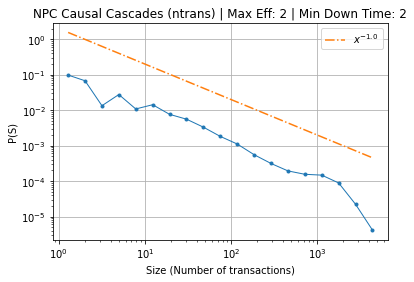

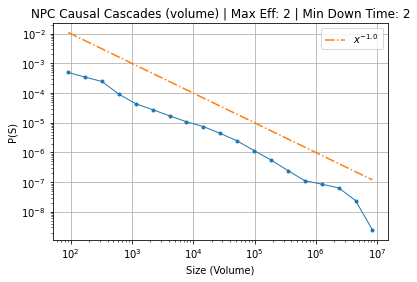

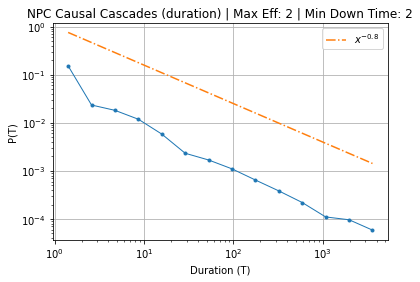

In [15]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

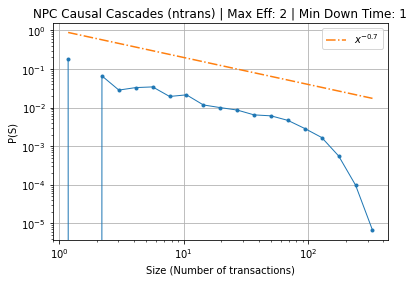

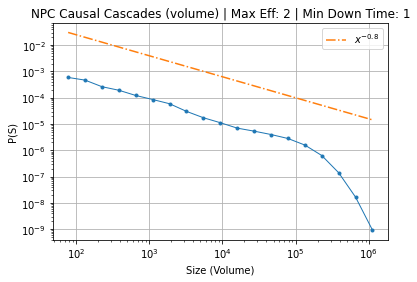

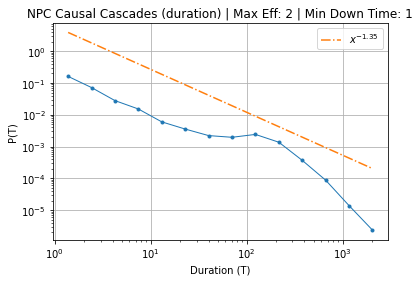

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

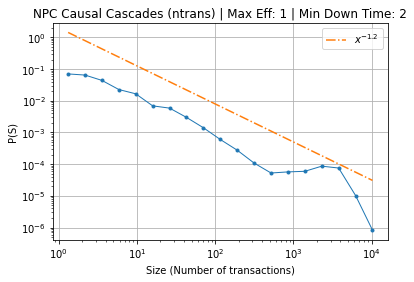

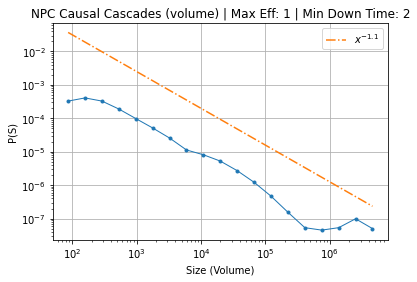

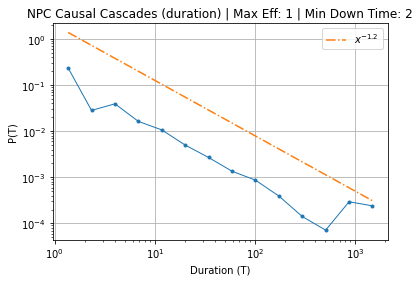

In [9]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*2, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_500_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*2, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_500_7200_100_5_10_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

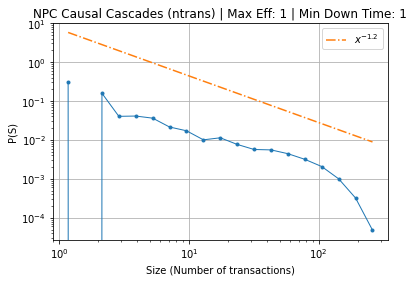

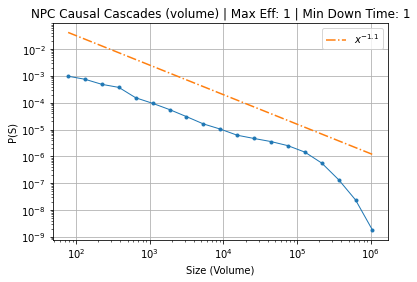

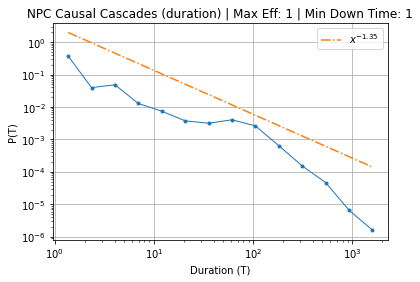

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
